In [152]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

# from statsmodels.graphics.tsaplots import plot_acf
# from statsmodels.tsa.stattools import adfuller
# from scipy.ndimage.interpolation import shift

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline

In [2]:
# Versões dos pacotes usados no notebook

%reload_ext watermark
%watermark -a "César S. Hooper/ Novembro 2022" --iversions
!python --version

Author: César S. Hooper/ Novembro 2022

pandas    : 1.2.4
matplotlib: 3.3.4
sklearn   : 0.24.1
cv2       : 4.5.4-dev
numpy     : 1.19.5

Python 3.8.8


In [4]:
path = 'C:/Users/Cesar Hooper/Desktop/github/bolsa_chile/resumen.csv'

In [148]:
datos = pd.read_excel('micro emini ES 08-07 18_43.xls', sheet_name='5 mins - 5 D')
datos2 = pd.read_excel('micro emini ES 08-12 17_47.xls')
datos3 = pd.read_excel('micro emini ES 08-13 17_10.xls')
datos4 = pd.read_excel('micro emini ES 08-14 18_48.xls')
datos5 = pd.read_excel('micro emini ES 08-15 19_08.xls')
datos6 = pd.read_excel('micro emini ES 08-19 17_41.xls')

In [149]:
datos.head()

,HORA,OPEN,HIGH,LOW,CLOSE,VOLUME,Unnamed: 6,Vol,ADX1,C,...,..4,..5,..6,..7,..8,..9,..10,..11,c>34,..12
0,18:00,3958.25,3961.00,3954.25,3959.50,2067,NaN,2067,3959.50,3959.50,...,▲,▲,NaN,NaN,NaN,NaN,NaN,NaN,▲,NaN
1,18:05,3959.75,3960.25,3958.75,3959.50,525,NaN,525,100.00,3959.50,...,▲,▲,NaN,NaN,NaN,NaN,NaN,NaN,▲,NaN
2,18:10,3959.75,3960.00,3954.50,3954.75,839,NaN,839,99.71,3954.75,...,▲,▲,NaN,NaN,NaN,NaN,NaN,NaN,▲,NaN
3,18:15,3954.50,3955.75,3951.50,3952.25,1729,NaN,1729,99.48,3952.25,...,▲,▲,NaN,NaN,NaN,NaN,NaN,NaN,▲,NaN
4,18:20,3952.25,3954.25,3947.50,3947.50,2579,NaN,2579,99.13,3947.50,...,▲,▲,▼,NaN,NaN,NaN,NaN,NaN,▲,NaN


<AxesSubplot:>

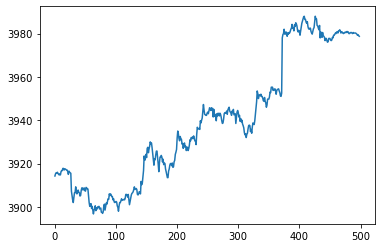

In [13]:
close = datos['Unnamed: 2']
close.plot()

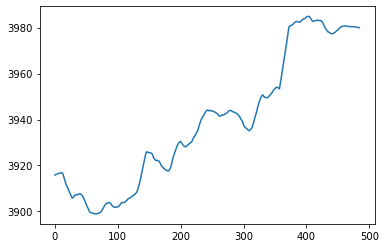

In [101]:
# restamos media móvil
ventana = 15
close_md = close.rolling(window=ventana).mean()
# print(close_md.mean(), len(close_md), close.mean())
close_array = np.array(close_md)
y = close_array[ventana-1::];
x = np.arange(0, len(y))
plt.plot(x, y)

In [102]:
# ajuste lineal
fit = np.polyfit(x,y, 1)
fit

array([1.93402661e-01, 3.89212814e+03])

In [103]:
u = lambda z: fit[1] + fit[0]*z

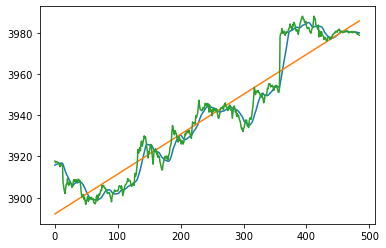

In [104]:
plt.plot(x, y, x, u(x), x, np.array(close[ventana-1::]))

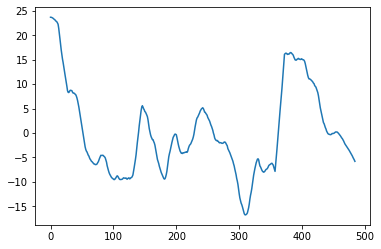

In [105]:
plt.plot(x, y-u(x))

In [119]:
dados = np.array(close_md[ventana-1::])

In [150]:
# dataset dim=7, step=1, prev=1 // cria_dataset(datos, dim, step, prevision)
dataset = cria_dataset(dados, 5, 1, 1)
dataset.head()

,x0,x1,x2,x3,x4,target
0,3915.816667,3916.000000,3916.150000,3916.266667,3916.383333,3916.450000
1,3916.000000,3916.150000,3916.266667,3916.383333,3916.450000,3916.550000
2,3916.150000,3916.266667,3916.383333,3916.450000,3916.550000,3916.633333
3,3916.266667,3916.383333,3916.450000,3916.550000,3916.633333,3916.650000
4,3916.383333,3916.450000,3916.550000,3916.633333,3916.650000,3916.733333


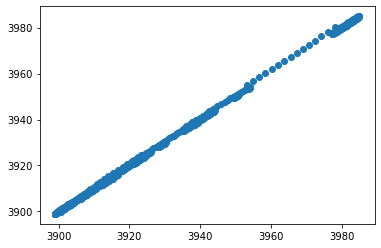

In [147]:
plt.scatter(dataset.x4, dataset.target)

In [153]:
y = dataset['target'];
X = dataset.drop('target', axis=1);

## Creación modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6)

# Vamos a escalar los datos. 
# Crea el objeto y fitea
scaler = StandardScaler()
scaler.fit(X_train)

# normaliza los datos. tf: transformados o escalados
X_train_tf = scaler.transform(X_train)
X_test_tf = scaler.transform(X_test)

# aplicação do modelo
rfr = RandomForestRegressor(n_estimators=1000, max_depth=50)
rfr.fit(X_train_tf, y_train)



RandomForestRegressor(max_depth=50, n_estimators=1000)

In [154]:
y_train_pred= rfr.predict(X_train_tf)
y_test_pred = rfr.predict(X_test_tf)

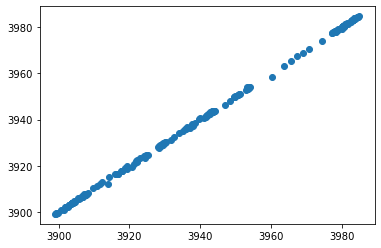

In [155]:
plt.scatter(y_train, y_train_pred)

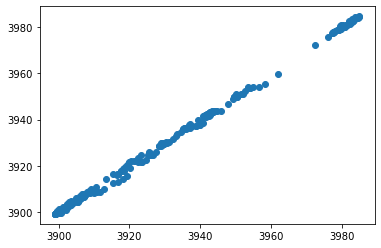

In [156]:
plt.scatter(y_test, y_test_pred)

## Random Forest

In [20]:
# Random Forest
# crea Classifier
rfc=RandomForestClassifier(n_estimators=300, criterion='entropy', min_samples_split=10)

# Entrena modelo y lo aplica para predecir
rfc.fit(X_train_tf,y_train)

y_train_pred_rf = rfc.predict(X_train_tf)
y_test_pred_rf = rfc.predict(X_test_tf)

print("Accuracy test: %.5f"%metrics.accuracy_score(y_test, y_test_pred_rf), '\n'
     'Accuracy train: %.5f'%metrics.accuracy_score(y_train, y_train_pred_rf))

Accuracy test: 0.98667 
Accuracy train: 0.99713


In [21]:
matriz_conf_rf = confusion_matrix(y_test, y_test_pred_rf)
matriz_conf_rf

array([[94,  2],
       [ 0, 54]], dtype=int64)

In [106]:
def cria_dataset(dados, dim, step, pred):
    
    """
    Cria dataset a partir de uma serie de tempo ---
    
    -- dados: serie de tempo
    -- dim: dimensão do vector
    -- step: intercalado para seleção dos dados
    -- pred: dia target para prever
    -- return: retorna dataframe com vetores e target
    """
   
    N = len(dados)
    
    if ((dim-1)*step+pred)>N: print('Problemas com Dimensões dos objetos')
    
    dataset = pd.DataFrame(columns=['x'+str(u) for u in range(dim)])
    targets = []
    
    k = 0
    while True:
        
        if (k + (dim-1)*step + pred) == N: break 
        else:             
            dataset.loc[k] = [dados[u] for u in range(k, k + (dim-1)*step + 1, step)]
            targets.append(dados[k + (dim-1)*step + pred])
            k += 1    
    
    dataset['target'] = targets
    
    return dataset
        